In [1]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow import keras
import keras.models
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
def loadData():
    with h5py.File('data.h5','r') as hf:
      print('List of arrays in this file: \n', hf.keys())
      allTrain = hf.get('trainData')
      allTest = hf.get('testData')
      npTrain = np.array(allTrain)
      npTest = np.array(allTest)
        

    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

trainX, trainY, testX, testY = loadData()

print('Shape of the feature training data: \n', trainX.shape)
print('Shape of the feature test data: \n', testX.shape)
print('Shape of the true training class labels: \n', trainY.shape)
print('Shape of the true test class labels: \n', testY.shape)

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the feature training data: 
 (200000, 784)
Shape of the feature test data: 
 (17000, 784)
Shape of the true training class labels: 
 (200000,)
Shape of the true test class labels: 
 (17000,)


In [3]:
epochs = 30

##  Single layer of ReLU activation neurons connected to a Softmax layer

In [10]:
model=tf.keras.models.Sequential([layers.Dense(10, activation=tf.nn.softmax, input_shape= (784,))])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 2s 10us/sample - loss: 0.7546 - accuracy: 0.7996 - val_loss: 0.6644 - val_accuracy: 0.8239
Epoch 2/30
170000/170000 [==============================] - 1s 8us/sample - loss: 0.6543 - accuracy: 0.8276 - val_loss: 0.6467 - val_accuracy: 0.8276
Epoch 3/30
170000/170000 [==============================] - 1s 9us/sample - loss: 0.6421 - accuracy: 0.8301 - val_loss: 0.6433 - val_accuracy: 0.8284
Epoch 4/30
170000/170000 [==============================] - 1s 9us/sample - loss: 0.6360 - accuracy: 0.8314 - val_loss: 0.6406 - val_accuracy: 0.8294
Epoch 5/30
170000/170000 [==============================] - 2s 9us/sample - loss: 0.6321 - accuracy: 0.8323 - val_loss: 0.6363 - val_accuracy: 0.8323
Epoch 6/30
170000/170000 [==============================] - 1s 8us/sample - loss: 0.6295 - accuracy: 0.8330 - val_loss: 0.6360 - val_accuracy: 0.8316
Epoch 7/30
170000/170000 [======================

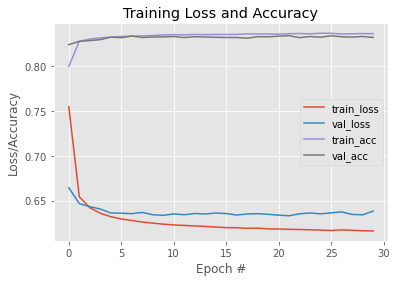

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs, batch_size=256)
resultsProb = model.predict(testX)
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))

plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2 layers: L1 200 Neurons L2 Softmax

In [12]:
model=tf.keras.models.Sequential([layers.Dense(200, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 3s 16us/sample - loss: 0.5372 - accuracy: 0.8442 - val_loss: 0.4513 - val_accuracy: 0.8699
Epoch 2/30
170000/170000 [==============================] - 2s 14us/sample - loss: 0.4150 - accuracy: 0.8795 - val_loss: 0.4163 - val_accuracy: 0.8797
Epoch 3/30
170000/170000 [==============================] - 2s 15us/sample - loss: 0.3732 - accuracy: 0.8919 - val_loss: 0.4018 - val_accuracy: 0.8868
Epoch 4/30
170000/170000 [==============================] - 2s 14us/sample - loss: 0.3464 - accuracy: 0.8991 - val_loss: 0.3949 - val_accuracy: 0.8857
Epoch 5/30
170000/170000 [==============================] - 2s 14us/sample - loss: 0.3247 - accuracy: 0.9052 - val_loss: 0.3907 - val_accuracy: 0.8900
Epoch 6/30
170000/170000 [==============================] - 2s 14us/sample - loss: 0.3077 - accuracy: 0.9099 - val_loss: 0.3837 - val_accuracy: 0.8920
Epoch 7/30
170000/170000 [=================

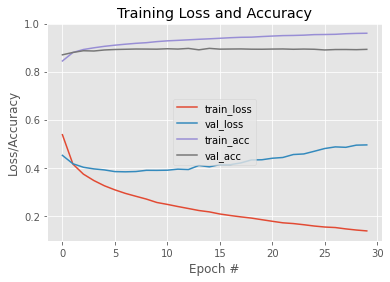

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs,batch_size=256)
resultsProb = model.predict(testX)
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))

plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()

## 3 Layers:  L1 400 Neurons L2 200 Neurons L3 Softmax

In [14]:
model=tf.keras.models.Sequential([layers.Dense(400, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 4s 25us/sample - loss: 0.4806 - accuracy: 0.8565 - val_loss: 0.4082 - val_accuracy: 0.8765
Epoch 2/30
170000/170000 [==============================] - 4s 25us/sample - loss: 0.3554 - accuracy: 0.8914 - val_loss: 0.3624 - val_accuracy: 0.8924
Epoch 3/30
170000/170000 [==============================] - 5s 28us/sample - loss: 0.3086 - accuracy: 0.9054 - val_loss: 0.3457 - val_accuracy: 0.8963
Epoch 4/30
170000/170000 [==============================] - 4s 26us/sample - loss: 0.2744 - accuracy: 0.9151 - val_loss: 0.3397 - val_accuracy: 0.8987
Epoch 5/30
170000/170000 [==============================] - 4s 25us/sample - loss: 0.2467 - accuracy: 0.9230 - val_loss: 0.3322 - val_accuracy: 0.9034
Epoch 6/30
170000/170000 [==============================] - 4s 24us/sample - loss: 0.2234 - accuracy: 0.9300 - val_loss: 0.3424 - val_accuracy: 0.9002
Epoch 7/30
170000/170000 [=================

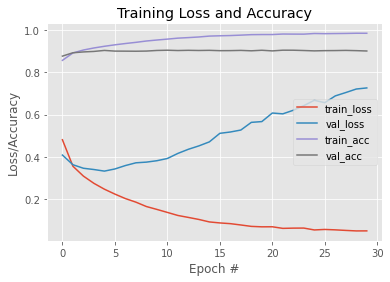

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs,batch_size=256)
resultsProb = model.predict(testX)
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))

plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()

## 4 Layers: L1 600 Neurons L2 400 Neurons L3 200 Neurons L4 Softmax

In [16]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 48us/sample - loss: 0.4641 - accuracy: 0.8594 - val_loss: 0.3966 - val_accuracy: 0.8780
Epoch 2/30
170000/170000 [==============================] - 7s 42us/sample - loss: 0.3426 - accuracy: 0.8940 - val_loss: 0.3484 - val_accuracy: 0.8943
Epoch 3/30
170000/170000 [==============================] - 7s 42us/sample - loss: 0.2943 - accuracy: 0.9076 - val_loss: 0.3402 - val_accuracy: 0.8952
Epoch 4/30
170000/170000 [==============================] - 7s 43us/sample - loss: 0.2597 - accuracy: 0.9175 - val_loss: 0.3265 - val_accuracy: 0.9043
Epoch 5/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.2332 - accuracy: 0.9250 - val_loss: 0.3367 - val_accuracy: 0.9034
Epoch 6/30
170000/170000 [==============================] - 7s 42us/sample - loss: 0.2055 - accuracy: 0.9340 - val_loss: 0.3458 - val_accuracy: 0.9013
Epoch 7/30
170000/170000 [=================

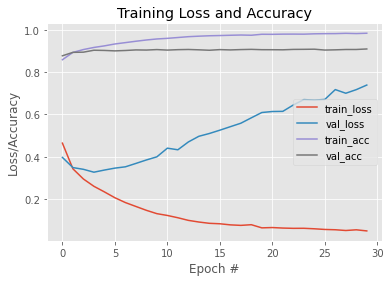

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs,batch_size=256)
resultsProb = model.predict(testX)
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))

plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()

### 5 Layers: L1 600 Neurons L2 400 Neurons L3 200 Neurons L4 100 Neurons L5 Softmax

In [18]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 48us/sample - loss: 0.4711 - accuracy: 0.8564 - val_loss: 0.3931 - val_accuracy: 0.8793
Epoch 2/30
170000/170000 [==============================] - 8s 49us/sample - loss: 0.3493 - accuracy: 0.8907 - val_loss: 0.3587 - val_accuracy: 0.8897
Epoch 3/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3026 - accuracy: 0.9042 - val_loss: 0.3394 - val_accuracy: 0.8977
Epoch 4/30
170000/170000 [==============================] - 8s 45us/sample - loss: 0.2714 - accuracy: 0.9141 - val_loss: 0.3253 - val_accuracy: 0.9037
Epoch 5/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.2439 - accuracy: 0.9222 - val_loss: 0.3241 - val_accuracy: 0.9027
Epoch 6/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.2203 - accuracy: 0.9295 - val_loss: 0.3402 - val_accuracy: 0.9010
Epoch 7/30
170000/170000 [=================

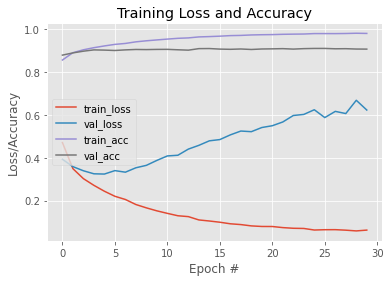

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs,batch_size=256)
resultsProb = model.predict(testX)
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))

plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()

#### 4 Layers: L1 600 Neurons L2 400 Neurons L3 200 Neurons L4 Softmax with  dropout regularization 

In [9]:
epochs = 30

In [7]:
def builtModel():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(trainX, trainY, validation_split=0.15, epochs=epochs,batch_size=256)
    resultsProb = model.predict(testX)
    results = np.argmax(resultsProb, axis =1)
    print(confusion_matrix(testY, results))

    plt.style.use("ggplot") 
    plt.figure()
    plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss") 
    plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc") 
    plt.title("Training Loss and Accuracy") 
    plt.xlabel("Epoch #") 
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [11]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.2),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
builtModel()

In [12]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.3),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 13s 79us/sample - loss: 0.5575 - accuracy: 0.8320 - val_loss: 0.4253 - val_accuracy: 0.8687
Epoch 2/30
170000/170000 [==============================] - 12s 73us/sample - loss: 0.4359 - accuracy: 0.8667 - val_loss: 0.3859 - val_accuracy: 0.8811
Epoch 3/30
170000/170000 [==============================] - 12s 72us/sample - loss: 0.3992 - accuracy: 0.8771 - val_loss: 0.3653 - val_accuracy: 0.8893
Epoch 4/30
170000/170000 [==============================] - 12s 71us/sample - loss: 0.3753 - accuracy: 0.8842 - val_loss: 0.3567 - val_accuracy: 0.8906
Epoch 5/30
170000/170000 [==============================] - 12s 70us/sample - loss: 0.3568 - accuracy: 0.8890 - val_loss: 0.3352 - val_accuracy: 0.8974
Epoch 6/30
170000/170000 [==============================] - 12s 72us/sample - loss: 0.3408 - accuracy: 0.8935 - val_loss: 0.3390 - val_accuracy: 0.8966
Epoch 7/30
170000/170000 [===========

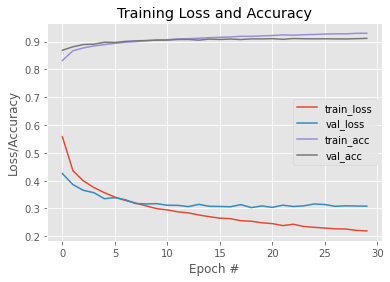

In [13]:
builtModel()

In [30]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.4),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 48us/sample - loss: 0.5992 - accuracy: 0.8200 - val_loss: 0.4405 - val_accuracy: 0.8661
Epoch 2/30
170000/170000 [==============================] - 8s 48us/sample - loss: 0.4724 - accuracy: 0.8573 - val_loss: 0.4026 - val_accuracy: 0.8781
Epoch 3/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4355 - accuracy: 0.8686 - val_loss: 0.3831 - val_accuracy: 0.8843
Epoch 4/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4094 - accuracy: 0.8754 - val_loss: 0.3636 - val_accuracy: 0.8913
Epoch 5/30
170000/170000 [==============================] - 8s 45us/sample - loss: 0.3926 - accuracy: 0.8792 - val_loss: 0.3591 - val_accuracy: 0.8932
Epoch 6/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3791 - accuracy: 0.8835 - val_loss: 0.3495 - val_accuracy: 0.8950
Epoch 7/30
170000/170000 [=================

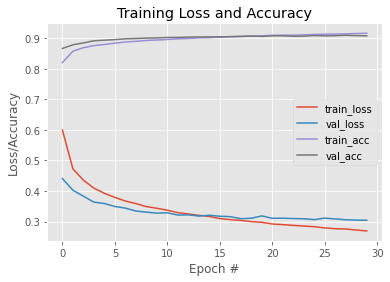

In [31]:
builtModel()

In [14]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.5),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.5),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.5),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 13s 76us/sample - loss: 0.6654 - accuracy: 0.8012 - val_loss: 0.4658 - val_accuracy: 0.8612
Epoch 2/30
170000/170000 [==============================] - 12s 72us/sample - loss: 0.5199 - accuracy: 0.8444 - val_loss: 0.4392 - val_accuracy: 0.8713
Epoch 3/30
170000/170000 [==============================] - 13s 74us/sample - loss: 0.4807 - accuracy: 0.8559 - val_loss: 0.4096 - val_accuracy: 0.8767
Epoch 4/30
170000/170000 [==============================] - 13s 74us/sample - loss: 0.4566 - accuracy: 0.8629 - val_loss: 0.3894 - val_accuracy: 0.8829
Epoch 5/30
170000/170000 [==============================] - 13s 74us/sample - loss: 0.4384 - accuracy: 0.8677 - val_loss: 0.3741 - val_accuracy: 0.8872
Epoch 6/30
170000/170000 [==============================] - 13s 75us/sample - loss: 0.4245 - accuracy: 0.8714 - val_loss: 0.3767 - val_accuracy: 0.8889
Epoch 7/30
170000/170000 [===========

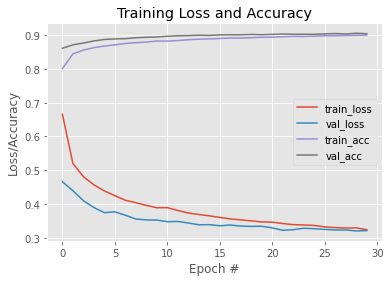

In [15]:
builtModel()

In [16]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.5),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 13s 75us/sample - loss: 0.6153 - accuracy: 0.8152 - val_loss: 0.4464 - val_accuracy: 0.8632
Epoch 2/30
170000/170000 [==============================] - 12s 72us/sample - loss: 0.4890 - accuracy: 0.8518 - val_loss: 0.4106 - val_accuracy: 0.8757
Epoch 3/30
170000/170000 [==============================] - 14s 81us/sample - loss: 0.4519 - accuracy: 0.8626 - val_loss: 0.3903 - val_accuracy: 0.8814
Epoch 4/30
170000/170000 [==============================] - 14s 85us/sample - loss: 0.4309 - accuracy: 0.8687 - val_loss: 0.3752 - val_accuracy: 0.8870
Epoch 5/30
170000/170000 [==============================] - 13s 76us/sample - loss: 0.4134 - accuracy: 0.8744 - val_loss: 0.3703 - val_accuracy: 0.8878
Epoch 6/30
170000/170000 [==============================] - 11s 67us/sample - loss: 0.4005 - accuracy: 0.8775 - val_loss: 0.3555 - val_accuracy: 0.8923
Epoch 7/30
170000/170000 [===========

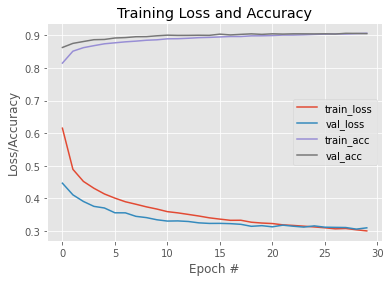

In [17]:
builtModel()

In [18]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.4),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.5681 - accuracy: 0.8283 - val_loss: 0.4281 - val_accuracy: 0.8691
Epoch 2/30
170000/170000 [==============================] - 8s 44us/sample - loss: 0.4495 - accuracy: 0.8627 - val_loss: 0.3862 - val_accuracy: 0.8817
Epoch 3/30
170000/170000 [==============================] - 8s 44us/sample - loss: 0.4125 - accuracy: 0.8736 - val_loss: 0.3624 - val_accuracy: 0.8881
Epoch 4/30
170000/170000 [==============================] - 8s 44us/sample - loss: 0.3888 - accuracy: 0.8801 - val_loss: 0.3568 - val_accuracy: 0.8919
Epoch 5/30
170000/170000 [==============================] - 7s 44us/sample - loss: 0.3716 - accuracy: 0.8849 - val_loss: 0.3426 - val_accuracy: 0.8942
Epoch 6/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.3564 - accuracy: 0.8896 - val_loss: 0.3394 - val_accuracy: 0.8979
Epoch 7/30
170000/170000 [=================

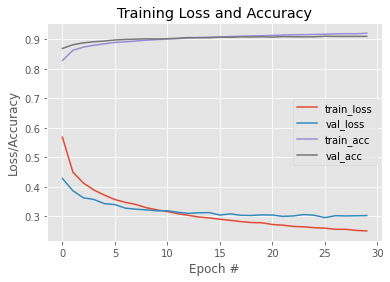

In [19]:
builtModel()

### 5 Layers: L1 600 Neurons L2 400 Neurons L3 200 Neurons L4 100 Neurons L5 Softmax with dropout regularization 

In [23]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.2),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 10s 59us/sample - loss: 0.5520 - accuracy: 0.8331 - val_loss: 0.4253 - val_accuracy: 0.8691
Epoch 2/30
170000/170000 [==============================] - 9s 56us/sample - loss: 0.4230 - accuracy: 0.8708 - val_loss: 0.3848 - val_accuracy: 0.8806
Epoch 3/30
170000/170000 [==============================] - 10s 56us/sample - loss: 0.3831 - accuracy: 0.8827 - val_loss: 0.3553 - val_accuracy: 0.8901
Epoch 4/30
170000/170000 [==============================] - 9s 55us/sample - loss: 0.3538 - accuracy: 0.8906 - val_loss: 0.3426 - val_accuracy: 0.8960
Epoch 5/30
170000/170000 [==============================] - 9s 53us/sample - loss: 0.3358 - accuracy: 0.8964 - val_loss: 0.3385 - val_accuracy: 0.8968
Epoch 6/30
170000/170000 [==============================] - 9s 54us/sample - loss: 0.3204 - accuracy: 0.9007 - val_loss: 0.3289 - val_accuracy: 0.8999
Epoch 7/30
170000/170000 [===============

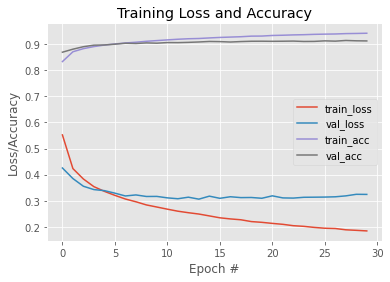

In [24]:
builtModel()

In [20]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.3),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.6019 - accuracy: 0.8197 - val_loss: 0.4351 - val_accuracy: 0.8687
Epoch 2/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4608 - accuracy: 0.8618 - val_loss: 0.4089 - val_accuracy: 0.8788
Epoch 3/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4234 - accuracy: 0.8724 - val_loss: 0.3684 - val_accuracy: 0.8870
Epoch 4/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3948 - accuracy: 0.8810 - val_loss: 0.3587 - val_accuracy: 0.8892
Epoch 5/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.3764 - accuracy: 0.8855 - val_loss: 0.3460 - val_accuracy: 0.8940
Epoch 6/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3613 - accuracy: 0.8895 - val_loss: 0.3430 - val_accuracy: 0.8955
Epoch 7/30
170000/170000 [=================

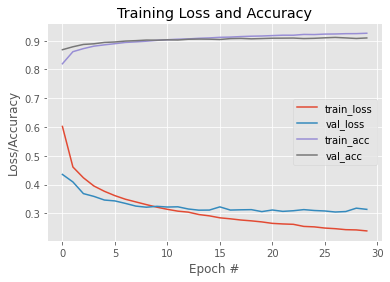

In [21]:
builtModel()

In [22]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.4),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.6711 - accuracy: 0.8007 - val_loss: 0.4599 - val_accuracy: 0.8599
Epoch 2/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.5075 - accuracy: 0.8501 - val_loss: 0.4258 - val_accuracy: 0.8708
Epoch 3/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4708 - accuracy: 0.8602 - val_loss: 0.3971 - val_accuracy: 0.8809
Epoch 4/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4402 - accuracy: 0.8690 - val_loss: 0.3852 - val_accuracy: 0.8833
Epoch 5/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.4202 - accuracy: 0.8745 - val_loss: 0.3704 - val_accuracy: 0.8866
Epoch 6/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4055 - accuracy: 0.8788 - val_loss: 0.3583 - val_accuracy: 0.8914
Epoch 7/30
170000/170000 [=================

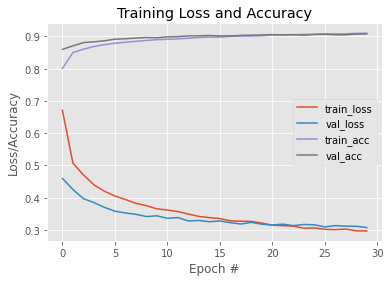

In [23]:
builtModel()

In [8]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.5),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.5),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.5),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.5),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/40
170000/170000 [==============================] - 9s 51us/sample - loss: 0.7931 - accuracy: 0.7616 - val_loss: 0.4979 - val_accuracy: 0.8521
Epoch 2/40
170000/170000 [==============================] - 8s 48us/sample - loss: 0.5637 - accuracy: 0.8359 - val_loss: 0.4645 - val_accuracy: 0.8625
Epoch 3/40
170000/170000 [==============================] - 9s 51us/sample - loss: 0.5194 - accuracy: 0.8487 - val_loss: 0.4287 - val_accuracy: 0.8726
Epoch 4/40
170000/170000 [==============================] - 9s 53us/sample - loss: 0.4966 - accuracy: 0.8548 - val_loss: 0.4164 - val_accuracy: 0.8772
Epoch 5/40
170000/170000 [==============================] - 9s 54us/sample - loss: 0.4755 - accuracy: 0.8615 - val_loss: 0.4008 - val_accuracy: 0.8810
Epoch 6/40
170000/170000 [==============================] - 9s 51us/sample - loss: 0.4605 - accuracy: 0.8648 - val_loss: 0.3923 - val_accuracy: 0.8843
Epoch 7/40
170000/170000 [=================

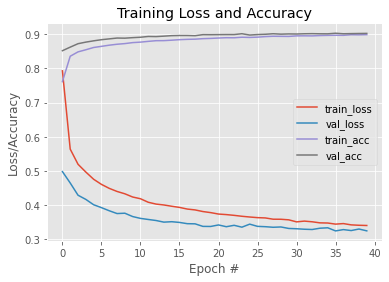

In [9]:
epochs = 40
builtModel()

In [10]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.5),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.4),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/40
170000/170000 [==============================] - 10s 56us/sample - loss: 0.6480 - accuracy: 0.8055 - val_loss: 0.4663 - val_accuracy: 0.8594
Epoch 2/40
170000/170000 [==============================] - 10s 57us/sample - loss: 0.5053 - accuracy: 0.8479 - val_loss: 0.4303 - val_accuracy: 0.8705
Epoch 3/40
170000/170000 [==============================] - 9s 56us/sample - loss: 0.4704 - accuracy: 0.8589 - val_loss: 0.3982 - val_accuracy: 0.8789
Epoch 4/40
170000/170000 [==============================] - 9s 52us/sample - loss: 0.4428 - accuracy: 0.8669 - val_loss: 0.3802 - val_accuracy: 0.8835
Epoch 5/40
170000/170000 [==============================] - 10s 56us/sample - loss: 0.4243 - accuracy: 0.8712 - val_loss: 0.3655 - val_accuracy: 0.8886
Epoch 6/40
170000/170000 [==============================] - 9s 53us/sample - loss: 0.4124 - accuracy: 0.8747 - val_loss: 0.3664 - val_accuracy: 0.8896
Epoch 7/40
170000/170000 [==============

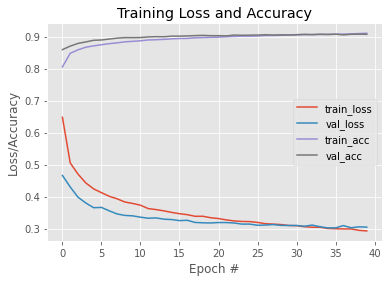

In [11]:
builtModel()

In [12]:
model=tf.keras.models.Sequential([layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                  layers.Dropout(0.4),
                                  layers.Dense(400, activation=tf.nn.relu),
                                  layers.Dropout(0.3),
                                  layers.Dense(200, activation=tf.nn.relu),
                                  layers.Dropout(0.2),
                                  layers.Dense(100, activation=tf.nn.relu),
                                  layers.Dropout(0.1),
                                  layers.Dense(10, activation=tf.nn.softmax)])

Train on 170000 samples, validate on 30000 samples
Epoch 1/30
170000/170000 [==============================] - 8s 48us/sample - loss: 0.5801 - accuracy: 0.8241 - val_loss: 0.4351 - val_accuracy: 0.8659
Epoch 2/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.4605 - accuracy: 0.8597 - val_loss: 0.4025 - val_accuracy: 0.8750
Epoch 3/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.4223 - accuracy: 0.8711 - val_loss: 0.3712 - val_accuracy: 0.8867
Epoch 4/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3997 - accuracy: 0.8773 - val_loss: 0.3539 - val_accuracy: 0.8920
Epoch 5/30
170000/170000 [==============================] - 8s 47us/sample - loss: 0.3788 - accuracy: 0.8836 - val_loss: 0.3471 - val_accuracy: 0.8940
Epoch 6/30
170000/170000 [==============================] - 8s 46us/sample - loss: 0.3648 - accuracy: 0.8879 - val_loss: 0.3406 - val_accuracy: 0.8968
Epoch 7/30
170000/170000 [=================

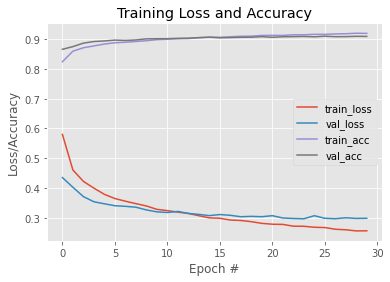

In [29]:
builtModel()